# Título (pensar)

**Declaración de dependencias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("classic")


**Obtención de dataset**

In [2]:
df_avocado = pd.read_csv("./datasets/avocado_ripeness_dataset.csv")
df_avocado.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


## Descripción del dataset y análisis estadístico

### Variables medidas

In [3]:
df_avocado.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

### Valores únicos y nans

In [4]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


El dataset está completo, sin valores nulos, y cada variable tiene el nivel de medición acorde. La ficha sugiere también computar la **densidad**, que es el cociente entre peso y tamaño. Como el peso está en gramos y el tamaño en centímetros cúbicos, la densidad será g/cm<sup>3</sup> :

In [5]:
df_avocado["density"] = df_avocado["weight_g"] / df_avocado["size_cm3"]

---

### Medidas de tendencia central y dispersión

In [6]:
df_avocado.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,density
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000,1.183738
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564,0.510849
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000,0.537415
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000,0.758929
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000,1.057726
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000,1.536703
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000,2.544554


### Rango intercuartílico y desvío estándar

In [7]:
def filtrar_iqr(df:pd.DataFrame, numeric_cols: list[str], factor:float = 1.5) -> pd.DataFrame:
    """Recibe un dataframe y una lista de columnas numéricas para aplicar el IQR. Por defecto el `factor` es 1.5
    pero puede cambiarse. El df en cuestión se copia

    Args:
        df (pd.DataFrame): pandas.Dataframe
        numeric_cols (list): Lista de columnas numéricas
        factor (float, optional): Factor de escalamiento de IQR. Defaultea a 1.5.

    Returns:
        pd.Dataframe: Copia del df original sin los registros que tengan outliers en alguna de las variables
    """
    _df = df.copy()
    for col in numeric_cols:
        q1 = _df[col].quantile(0.25)
        q3 = _df[col].quantile(0.75)
        iqr = (q3 - q1) * factor
        umbral_min = _df[col] > (q1 - iqr)
        umbral_max = _df[col] < (q3 + iqr)
        _df[col] = _df[col][umbral_min & umbral_max]
    return _df.dropna()

def filtrar_std(df:pd.DataFrame, numeric_cols: list[str], umbral:int = 3) -> pd.DataFrame:
    """Recibe un dataframe y una lista de columnas numéricas para filtrar los valores por fuera de `umbral` desvíos estándar de la media. Por defecto el `umbral` es 3
    pero puede cambiarse. El df en cuestión se copia

    Args:
        df (pd.DataFrame): pandas.Dataframe
        numeric_cols (list): Lista de columnas numéricas
        umbral (int, optional): Umbral de desvíos estándar. Defaultea a 3.

    Returns:
        pd.Dataframe: Copia del df original sin los registros que tengan outliers en alguna de las variables
    """
    _df = df.copy()
    for col in numeric_cols:
        std = _df[col].std()
        media = _df[col].mean()
        umbral_min = _df[col] > (media - (std * umbral))
        umbral_max = _df[col] < (media + (std * umbral))
        _df[col] = _df[col][umbral_min & umbral_max]
    return _df.dropna()

variables_numericas_train = [col for col in df_avocado.select_dtypes(np.number).columns]

df_avocado = filtrar_iqr(df_avocado, variables_numericas_train)
df_avocado

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,density
0,14.5,19,40,26,black,34,175,261,ripe,0.670498
1,71.7,53,69,75,green,69,206,185,pre-conditioned,1.113514
2,88.5,60,94,46,dark green,79,220,143,hard,1.538462
3,93.8,105,87,41,dark green,75,299,140,hard,2.135714
4,42.5,303,58,32,purple,63,200,227,breaking,0.881057
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,1.895522
246,21.6,17,36,19,black,47,182,240,firm-ripe,0.758333
247,14.0,4,40,17,black,37,188,274,ripe,0.686131
248,61.5,63,87,75,green,65,261,162,pre-conditioned,1.611111


El dataframe no tiene outliers por IQR en ninguna de sus variables numéricas

In [8]:
df_avocado = filtrar_std(df_avocado, variables_numericas_train)
df_avocado.describe()


,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,density
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000,1.183738
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564,0.510849
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000,0.537415
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000,0.758929
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000,1.057726
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000,1.536703
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000,2.544554


No hay valores que se vayan de 3 desvíos estándar de la media

---

## Variable target

La variable target tiene cinco categorías de madurez

In [9]:
df_avocado["ripeness"].unique()

array(['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'],
      dtype=object)

In [10]:
df_avocado["ripeness"].value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

Sus valores son balanceados idénticamente. Pero hay que binarizar el output. Para eso, se considerará que la fruta está madura si es *ripe* o *firm-ripe*

In [11]:
df_avocado["ripeness_binary"] = df_avocado["ripeness"].map(lambda status: 1 if status in ["ripe", "firm-ripe"] else 0)
df_avocado["ripeness_binary"].value_counts()

ripeness_binary
0    150
1    100
Name: count, dtype: int64

Ahora las categorías están sesgadas en favor de los no maduros, pero es esperable

### Análisis de correlación


In [12]:

df_avocado.select_dtypes(include=np.number).corr()


,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,density,ripeness_binary
firmness,1.000000,0.038071,0.807693,0.712119,0.951817,0.743636,-0.943758,0.898231,-0.855707
hue,0.038071,1.000000,0.204663,0.172986,0.150709,0.077141,-0.035083,-0.053673,-0.277797
saturation,0.807693,0.204663,1.000000,0.681025,0.803399,0.631171,-0.808331,0.758235,-0.729097
brightness,0.712119,0.172986,0.681025,1.000000,0.680530,0.557013,-0.707422,0.621426,-0.717376
sound_db,0.951817,0.150709,0.803399,0.680530,1.000000,0.735709,-0.925431,0.859241,-0.862350
weight_g,0.743636,0.077141,0.631171,0.557013,0.735709,1.000000,-0.722762,0.838622,-0.683134
size_cm3,-0.943758,-0.035083,-0.808331,-0.707422,-0.925431,-0.722762,1.000000,-0.941288,0.811486
density,0.898231,-0.053673,0.758235,0.621426,0.859241,0.838622,-0.941288,1.000000,-0.726403
ripeness_binary,-0.855707,-0.277797,-0.729097,-0.717376,-0.862350,-0.683134,0.811486,-0.726403,1.000000


In [13]:
df_avocado.select_dtypes(include=np.number).corr()["ripeness_binary"]

firmness          -0.855707
hue               -0.277797
saturation        -0.729097
brightness        -0.717376
sound_db          -0.862350
weight_g          -0.683134
size_cm3           0.811486
density           -0.726403
ripeness_binary    1.000000
Name: ripeness_binary, dtype: float64

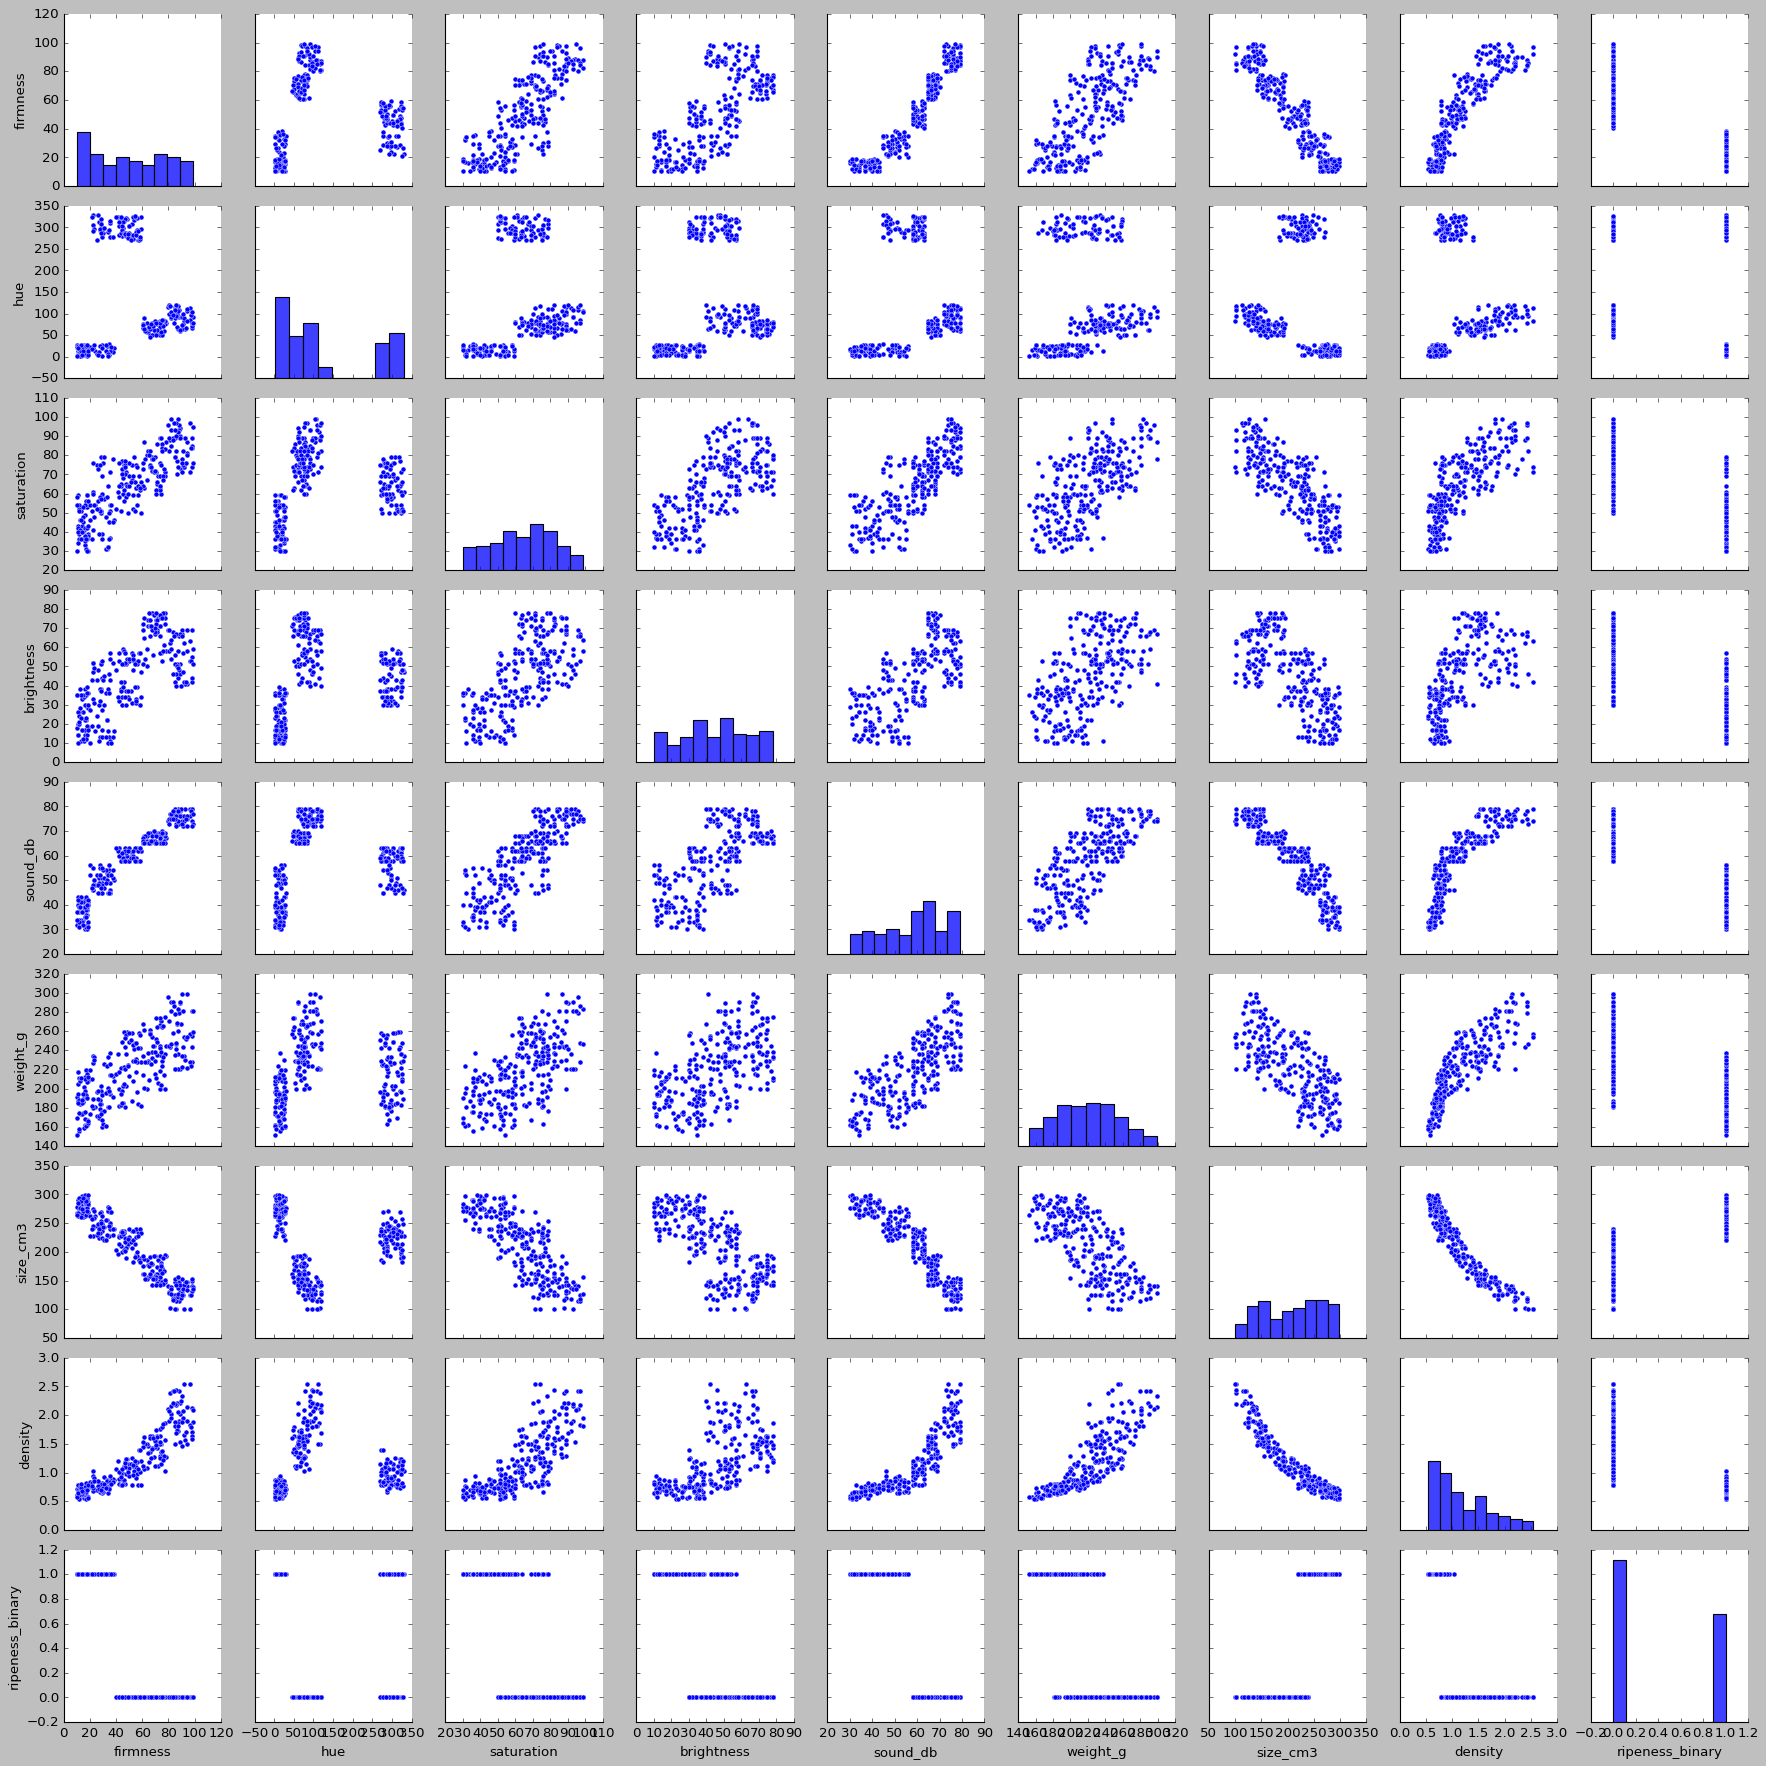

In [14]:
sns.pairplot(df_avocado)

### Selección de variables y encoding

In [15]:
def normalizador_max(valor:np.number, maximo:np.number)->np.number:
    return  valor / maximo

def normalizador_estandar(valor:np.number, media:np.number, desvio_estandar:np.number)->np.number:
    return (valor-media)/desvio_estandar

In [16]:
df_avocado_features = df_avocado[["firmness", "hue", "saturation", "brightness", "sound_db", "density"]] 
df_avocado_target = df_avocado["ripeness_binary"]

In [17]:
#Encodings alternativos
df_avocado_features_max = df_avocado_features.copy()
df_avocado_features_std = df_avocado_features.copy()
for col in df_avocado_features.columns:
    df_avocado_features_max[col] = df_avocado_features_max[col].apply(
        normalizador_max,args=(df_avocado_features_max[col].max(),)
        )
    df_avocado_features_std[col] = df_avocado_features_std[col].apply(
        normalizador_estandar, args=(df_avocado_features_std[col].mean(),df_avocado_features_std[col].std())
        )
    


In [18]:
df_avocado_features_max

,firmness,hue,saturation,brightness,sound_db,density
0,0.146761,0.057751,0.404040,0.333333,0.430380,0.263503
1,0.725709,0.161094,0.696970,0.961538,0.873418,0.437606
2,0.895749,0.182371,0.949495,0.589744,1.000000,0.604609
3,0.949393,0.319149,0.878788,0.525641,0.949367,0.839327
4,0.430162,0.920973,0.585859,0.410256,0.797468,0.346252
...,...,...,...,...,...,...
245,0.952429,0.252280,0.808081,0.743590,0.911392,0.744933
246,0.218623,0.051672,0.363636,0.243590,0.594937,0.298022
247,0.141700,0.012158,0.404040,0.217949,0.468354,0.269647
248,0.622470,0.191489,0.878788,0.961538,0.822785,0.633160


In [19]:
df_avocado_features_std

,firmness,hue,saturation,brightness,sound_db,density
0,-1.324101,-0.912977,-1.401611,-0.997683,-1.735495,-1.004679
1,0.772852,-0.622720,0.267248,1.565576,0.793749,-0.137466
2,1.388740,-0.562962,1.705919,0.048545,1.516390,0.694381
3,1.583038,-0.178798,1.303091,-0.213012,1.227334,1.863518
4,-0.297621,1.511521,-0.365768,-0.683815,0.360164,-0.592504
...,...,...,...,...,...,...
245,1.594036,-0.366611,0.900263,0.676282,1.010541,1.393336
246,-1.063815,-0.930051,-1.631799,-1.363863,-0.796062,-0.832739
247,-1.342431,-1.041031,-1.401611,-1.468486,-1.518703,-0.974077
248,0.398920,-0.537351,1.303091,1.565576,0.504693,0.836594


In [20]:
from sklearn.model_selection import train_test_split

trainsets = {}

X_train, X_test, Y_train, Y_test = train_test_split(df_avocado_features_std, df_avocado_target, test_size=1/3, random_state=42)
trainsets["max"] = {"X_train":X_train, "X_test":X_test, "Y_train":Y_train, "Y_test": Y_test}
X_train, X_test, Y_train, Y_test = train_test_split(df_avocado_features_max, df_avocado_target, test_size=1/3, random_state=42)
trainsets["std"] = {"X_train":X_train, "X_test":X_test, "Y_train":Y_train, "Y_test": Y_test}

## Entrenamiento de la red neuronal

### Clasificador

In [21]:
def sigmoide(x) -> np.number:
    return 1 / (1 + np.exp(-x))

def dx_sigmoide(x) -> np.number:
    return np.exp(-x) / (1 + np.exp(-x)) ** 2

def relu(x) -> np.number:
    return np.maximum(x, 0)

def dx_relu(x) -> bool:
    return x > 0

class AvocadoPerceptron():
    def __init__(self, variables: int, neuronas: int, salidas: int, random_state:int = 42) -> None:
        self._generador = np.random.seed(random_state)
        self.variables = variables
        self.neuronas = neuronas
        self.salidas = salidas
        #Era NEURONAS POR VARIABLES
        self.peso_oculto = np.random.rand(neuronas, variables)
        self.sesgo_oculto = np.random.rand(neuronas, 1)
        self.peso_salida = np.random.rand(salidas, neuronas)
        self.sesgo_salida = np.random.rand(salidas, 1)
        self.learning_rate = 0.001

    def _propagar_adelante(self, vector_entrada) -> dict[str,np.ndarray]:
        """Con esta función devolvemos un diccionario que nos muestra los valores de las matrices
        con los valores de pesos por entradas más sesgos, tanto sin activar (Z1 y Z2) como activadas (A1 y A2).
        Toma los pesos y sesgos actuales.
        """
        #Traspongo el vector de entrada para poder hacer la multiplicacion matricial
        vector_entrada_traspuesto = vector_entrada.T
        #Capa oculta numero 1 sin activar
        Z1 = self.peso_oculto @ vector_entrada_traspuesto + self.sesgo_oculto
        #Activación de Z1
        A1 = relu(Z1)
        #La salida activada de Z1 se pasa como parámetro a Z2
        Z2 = self.peso_salida @ A1 + self.sesgo_salida
        #La predicción consiste en la activación de Z2
        A2 = sigmoide(Z2)
        return {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}

    
    def predecir(self,vector_entrada, umbral:float = 0.5) -> np.number:
        """Obtiene la predicción (A2) de la función anterior."""
        pred = self._propagar_adelante(vector_entrada).get("A2") >= umbral
        return pred.astype(int).item()
        
    def getPesos(self):
        return {
            "self.peso_oculto":self.peso_oculto,
            "self.sesgo_oculto":self.sesgo_oculto,
            "self.peso_salida":self.peso_salida,
            "self.sesgo_oculto":self.sesgo_oculto
        }
    
    def reajustar_pesos(self,pesos: dict) -> None:
        """Aplicamos el descenso de gradiente estocástico con los pesos y sesgos producto del entrenamiento
        (eso es retornado por la función entrenar() en formato diccionario.)"""
        self.peso_oculto -= self.learning_rate * pesos.get("WH")
        self.sesgo_oculto -= self.learning_rate * pesos.get("BH")
        self.peso_salida -= self.learning_rate * pesos.get("WO")
        self.sesgo_oculto -= self.learning_rate * pesos.get("BO")
   
    def entrenar(self, vector_entrada, Y) -> dict[str,np.ndarray]: 
        """Entrenar la red consiste en propagar hacia atrás. Esto implica reajustar los pesos de las predicciones
        desde la salida hacia atrás.
        Por lo tanto, la función de costo toma la forma `C = (A2 - y)**2` =  y las sucesivas derivadas parciales son:
        - dC_A2 > dA2_Z2 > dZ2_WO > dZ2_A1 > dZ2_BO > dA1_Z1 > dZ1_WH > dZ1_BH  
        """
        base = self._propagar_adelante(vector_entrada)
        dC_A2 = 2*(base.get("A2") - Y)
        dA2_Z2 = dx_sigmoide(base.get("Z2"))
        dZ2_WO = base.get("A1")
        dZ2_A1 = self.peso_salida
        dZ2_BO = 1
        dA1_Z1 = dx_relu(base.get("Z1"))
        dZ1_WH = vector_entrada.T
        dZ1_BH = 1

        # Hacemos la multiplicación de las derivadas parciales
        # para obtener la derivada de la función de costo en función de todos los parámetros (pesos, sesgos y A1).
        # Esto se hace para ver cuánto afecta la variación de cada parámetro al costo final.
        dC_dW2 = dC_A2 @ dA2_Z2 @ dZ2_WO.T
        dC_dB2 = dC_A2 @ dA2_Z2 * dZ2_BO
        dC_dA1 = dC_A2 @ dA2_Z2 @ dZ2_A1
        dC_dW1 = dC_dA1 @ dA1_Z1 @ dZ1_WH.T
        dC_dB1 = dC_dA1 @ dA1_Z1 * dZ1_BH

        self.reajustar_pesos({"WO":dC_dW2, "BO":dC_dB2, "WH":dC_dW1, "BH":dC_dB1})


cls = AvocadoPerceptron(6,6,1)

#Prueba predecir sin entrenar
registro = trainsets.get("max").get("X_train").head(1).values
cls.predecir(registro)



1

---

### Entrenando con el de max

In [22]:
def calcular_accuracy(df_x_train, df_y_train, modelo, rango=0.5):
    """Esta función calcula la exactitud dada una matriz X de características y vector Y de salida.
    También toma como argumento el umbral de la función logística (la que activa Z2).
    """
    preds = []
    for trainset in df_x_train.values:
        preds.append(modelo.predecir(trainset.reshape(1,modelo.variables),rango))
    predicciones = pd.Series(preds,index=df_y_train.index,name="Predicciones")
    comp = pd.DataFrame([df_y_train,predicciones]).T
    comp["hits"] = comp.apply(lambda hit: hit["ripeness_binary"] == hit["Predicciones"], axis=1)
    return (comp["hits"].sum() / comp["hits"].shape[0]).round(3)

def umbral_optimo(df_x_train:pd.DataFrame, df_y_train:pd.Series, modelo: AvocadoPerceptron):
    """Esta función devuelve la exactitud para cada umbral (en forma de diccionario).
    """
    rangos = [i/10 for i in range(1, 10, 1)]
    predictores = {}
    for rango in rangos:
        predictores[str(rango)] = calcular_accuracy(df_x_train, df_y_train, modelo, rango)
    return predictores

def graficar_comparacion(comparaciones, x_label, y_label):
    """Esta función grafica la función anterior.
    Toma como argumentos las comparaciones y las etiquetas de los ejes "x" e "y".
    """
    fig, ax = plt.subplots()
    for key, compset in comparaciones.items():
            ax.plot(compset.keys(), compset.values())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(comparaciones.keys())
    plt.show()
    return ax

In [54]:
#Entrena al modelo por 100_000 iteraciones
comp = {}
for i in range (100_000):
    if i % 10000 == 0:
        comp[f"{i}_test"] = calcular_accuracy((trainsets.get("max").get("X_test")), trainsets.get("max").get("Y_test"), cls)
        comp[f"{i}_train"] = calcular_accuracy((trainsets.get("max").get("X_train")), trainsets.get("max").get("Y_train"), cls)
    inp = trainsets.get("max").get("X_train").sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    cls.entrenar(inp.values,pred)


In [ ]:
comp.keys()

dict_keys(['0_test', '0_train', '10000_test', '10000_train', '20000_test', '20000_train', '30000_test', '30000_train', '40000_test', '40000_train', '50000_test', '50000_train', '60000_test', '60000_train', '70000_test', '70000_train', '80000_test', '80000_train', '90000_test', '90000_train'])

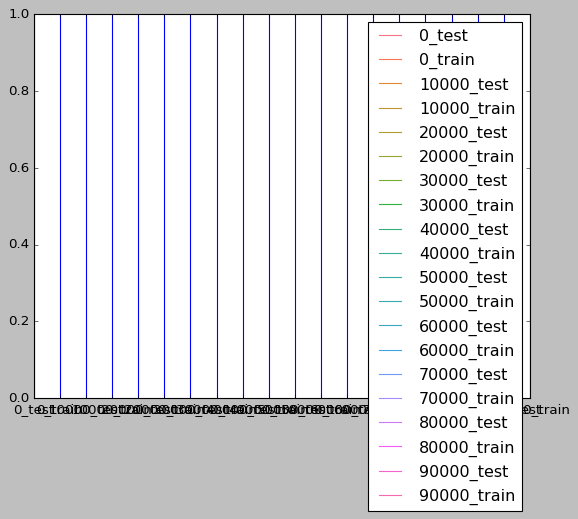

In [ ]:
#CORREGIR

axes = sns.lineplot(data=comp, x=comp.keys(), y=comp.values(), hue=comp.keys())
axes.vlines(comp.keys(), ymax=1,ymin=0)
plt.show()

#Las iteraciones se optimizan en 40000
# PROBAR DESPUÉS CON 42_000 ITERACIONES

In [25]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_train_max = umbral_optimo(trainsets.get("max").get("X_train"), trainsets.get("max").get("Y_train"), cls)
predicciones_train_max

{'0.1': np.float64(0.898),
 '0.2': np.float64(0.97),
 '0.3': np.float64(0.994),
 '0.4': np.float64(1.0),
 '0.5': np.float64(0.988),
 '0.6': np.float64(0.952),
 '0.7': np.float64(0.669),
 '0.8': np.float64(0.645),
 '0.9': np.float64(0.596)}

In [26]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_test_max = umbral_optimo(trainsets.get("max").get("X_test"), trainsets.get("max").get("Y_test"), cls)
predicciones_test_max

{'0.1': np.float64(0.869),
 '0.2': np.float64(0.964),
 '0.3': np.float64(0.964),
 '0.4': np.float64(0.988),
 '0.5': np.float64(1.0),
 '0.6': np.float64(0.952),
 '0.7': np.float64(0.69),
 '0.8': np.float64(0.643),
 '0.9': np.float64(0.607)}

### Entrenando con std

In [27]:
#Entrena al modelo por 100_000 iteraciones
cls_std = AvocadoPerceptron(6,6,1)
for i in range (100_000):
    inp = trainsets.get("std").get("X_train").sample(1)
    pred = trainsets.get("std").get("Y_train")[inp.index[0]]
    cls_std.entrenar(inp.values,pred)

In [28]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_train_std = umbral_optimo(trainsets.get("std").get("X_train"), trainsets.get("std").get("Y_train"), cls_std)
predicciones_train_std


{'0.1': np.float64(0.645),
 '0.2': np.float64(0.813),
 '0.3': np.float64(0.934),
 '0.4': np.float64(0.976),
 '0.5': np.float64(0.916),
 '0.6': np.float64(0.789),
 '0.7': np.float64(0.596),
 '0.8': np.float64(0.596),
 '0.9': np.float64(0.596)}

In [29]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_test_std = umbral_optimo(trainsets.get("std").get("X_test"), trainsets.get("std").get("Y_test"), cls_std)
predicciones_test_std

{'0.1': np.float64(0.667),
 '0.2': np.float64(0.81),
 '0.3': np.float64(0.905),
 '0.4': np.float64(0.964),
 '0.5': np.float64(0.929),
 '0.6': np.float64(0.81),
 '0.7': np.float64(0.607),
 '0.8': np.float64(0.607),
 '0.9': np.float64(0.607)}

### Comparacion accuracy

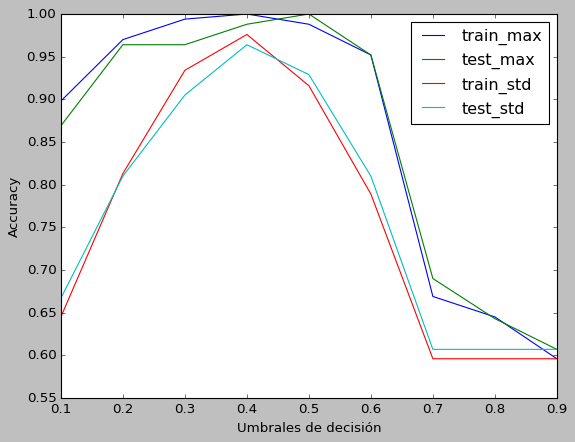

<Axes: xlabel='Umbrales de decisión', ylabel='Accuracy'>

In [30]:
comparaciones = {
    "train_max":predicciones_train_max,
    "test_max":predicciones_test_max,
    "train_std":predicciones_train_std,
    "test_std":predicciones_test_std
}
graficar_comparacion(comparaciones, "Umbrales de decisión", "Accuracy")

El normalizado por std performa peor que el de max. Nos vamos a basar en ese para reducir variables

---

# Reduciendo variables

### Prediciendo solo con el sonido

In [31]:
sonido = trainsets.get("max").get("X_train")[["sound_db"]] # X_train
sonido_test = trainsets.get("max").get("X_test")[["sound_db"]] # X_test

perceptron_sonido = AvocadoPerceptron(1, 6, 1)
perceptron_sonido.predecir(sonido.sample(1).values)



1

In [32]:
for i in range (100_000):
    inp = sonido.sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    perceptron_sonido.entrenar(inp.values,pred)

In [33]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_train_sonido= umbral_optimo(sonido, trainsets.get("max").get("Y_train"), perceptron_sonido)
predicciones_test_sonido = umbral_optimo(sonido_test, trainsets.get("max").get("Y_test"), perceptron_sonido)


### Firmeza

In [34]:
firmeza = trainsets.get("max").get("X_train")[["firmness"]] # X_train
firmeza_test = trainsets.get("max").get("X_test")[["firmness"]] # X_test

perceptron_firmeza = AvocadoPerceptron(1, 6, 1)
perceptron_firmeza.predecir(firmeza.sample(1).values)



1

In [35]:
for i in range (100_000):
    inp = firmeza.sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    perceptron_firmeza.entrenar(inp.values,pred)

In [36]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_train_firmeza= umbral_optimo(firmeza, trainsets.get("max").get("Y_train"), perceptron_firmeza)
predicciones_test_firmeza = umbral_optimo(firmeza_test, trainsets.get("max").get("Y_test"), perceptron_firmeza)

### Color

In [37]:
color = trainsets.get("max").get("X_train")[["hue","saturation","brightness"]] # X_train
color_test = trainsets.get("max").get("X_test")[["hue","saturation","brightness"]] # X_test

perceptron_color = AvocadoPerceptron(3, 6, 1)
perceptron_color.predecir(color.sample(1).values)



1

In [38]:
for i in range (100_000):
    inp = color.sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    perceptron_color.entrenar(inp.values,pred)

In [39]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_train_color= umbral_optimo(color, trainsets.get("max").get("Y_train"), perceptron_color)
predicciones_test_color = umbral_optimo(color_test, trainsets.get("max").get("Y_test"), perceptron_color)

### Densidad

In [40]:
densidad = trainsets.get("max").get("X_train")[["density"]] # X_train
densidad_test = trainsets.get("max").get("X_test")[["density"]] # X_test

perceptron_densidad = AvocadoPerceptron(1, 6, 1)
perceptron_densidad.predecir(densidad.sample(1).values)



1

In [41]:
for i in range (100_000):
    inp = densidad.sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    perceptron_densidad.entrenar(inp.values,pred)

In [42]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_train_densidad= umbral_optimo(densidad, trainsets.get("max").get("Y_train"), perceptron_densidad)
predicciones_test_densidad = umbral_optimo(densidad_test, trainsets.get("max").get("Y_test"), perceptron_densidad)

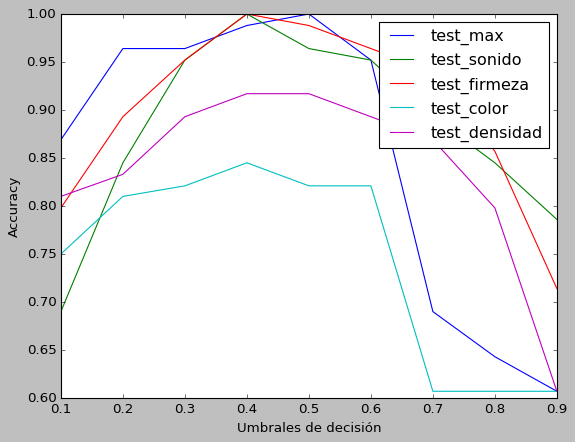

<Axes: xlabel='Umbrales de decisión', ylabel='Accuracy'>

In [43]:
comparaciones = {
    "test_max":predicciones_test_max,
    "test_sonido":predicciones_test_sonido,
    "test_firmeza":predicciones_test_firmeza,
    "test_color":predicciones_test_color,
    "test_densidad": predicciones_test_densidad
}

graficar_comparacion(comparaciones,"Umbrales de decisión", "Accuracy")

### Optimizacion del modelo

In [44]:
optimo = trainsets.get("max").get("X_train")[["sound_db","firmness"]] # X_train
optimo_test = trainsets.get("max").get("X_test")[["sound_db","firmness"]] # X_test

perceptron_optimo = AvocadoPerceptron(2, 6, 1)
perceptron_optimo.predecir(optimo.sample(1).values)



1

In [45]:
for i in range (100_000):
    inp = optimo.sample(1)
    pred = trainsets.get("max").get("Y_train")[inp.index[0]]
    perceptron_optimo.entrenar(inp.values,pred)

In [46]:
#Iteramos para ver el mejor umbral para predecir el valor
predicciones_train_optimo= umbral_optimo(optimo, trainsets.get("max").get("Y_train"), perceptron_optimo)
predicciones_test_optimo = umbral_optimo(optimo_test, trainsets.get("max").get("Y_test"), perceptron_optimo)

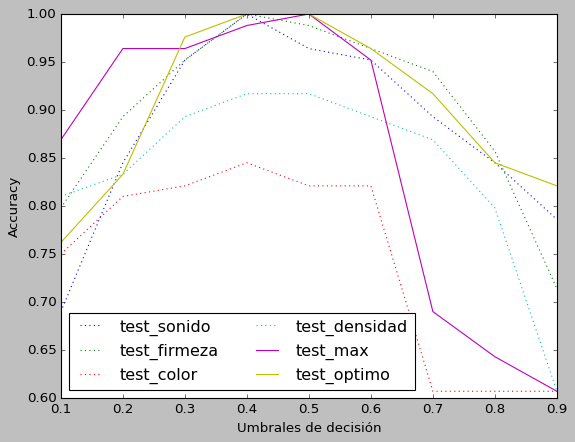

In [47]:
comparaciones = {
    "test_sonido":predicciones_test_sonido,
    "test_firmeza":predicciones_test_firmeza,
    "test_color":predicciones_test_color,
    "test_densidad": predicciones_test_densidad
}
comparaciones_optimo = {
    "test_max":predicciones_test_max,
    "test_optimo" : predicciones_test_optimo
}
fig, ax = plt.subplots()
for key, compset in comparaciones.items():
        ax.plot(compset.keys(), compset.values(), linestyle="dotted")

for key, compset in comparaciones_optimo.items():
        ax.plot(compset.keys(), compset.values(), linestyle="solid")
        
plt.xlabel("Umbrales de decisión")
plt.ylabel("Accuracy")
plt.legend(list(comparaciones.keys()) + list(comparaciones_optimo.keys()), loc="lower left", ncols=2)
plt.show()



Con un umbral de decisión en  0.5 y solo dos variables (firmeza y sonido) podemos alcanzar niveles de accuracy máximos para el conjunto de testeo

---

Comparacion con scikit-learn

In [48]:
from sklearn.neural_network import MLPClassifier

sklearn_model = MLPClassifier(solver="sgd", max_iter=100_000,random_state=42).fit(trainsets.get("max").get("X_train"),trainsets.get("max").get("Y_train"))
sklearn_model.score(trainsets.get("max").get("X_test"),trainsets.get("max").get("Y_test"))

1.0